# 9. Image enhancement – filtering

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = 'data' # Change this, according to your images' directory path

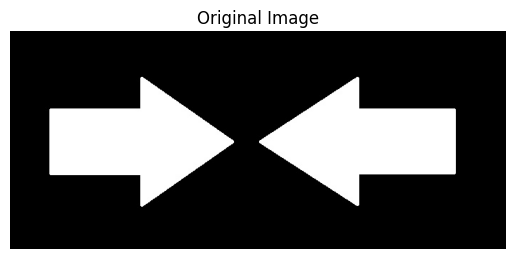

In [4]:
filename = 'corners_01.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

og_img = img.copy() # let's copy the image to be able to use it later without having to read it again

**a)** Use the Harris corner detector to detect the corners in one or more images of your choice. Try different
parameters, namely, neighborhood size, aperture for the Sobel operator and Harris detector free parameter.

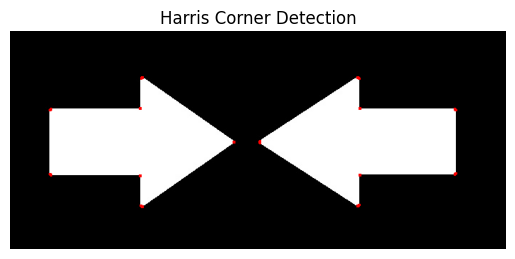

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

neighbourhood = 2
aperture = 3
free_param = 0.04
dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)

# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
thr = 0.01

img[dst > thr*dst.max()] = [0,0,255]

# convert to RGB for plotting with matplotlib
out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(out)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

**b)** Use the Shi-Tomasi corner detector to detect the corners in the same images. Try different parameters, namely,
block size, and aperture for the Sobel operator; compare the results with those of Harr is detector for the equivalent
parameters; notice that the Shi-Tomasi implementation has more parameters than Harris implementation.

/tmp/ipykernel_5857/1567439729.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


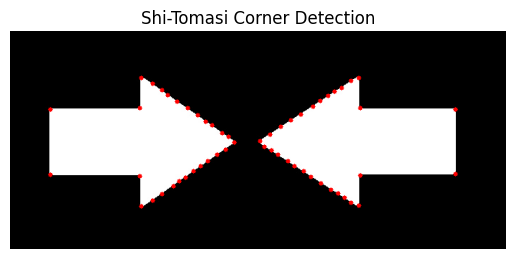

In [6]:
max_corners = 200
quality = 0.01
mindist = 10
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners = np.int0(corners)

img2 = og_img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img2, (x,y), 3, 255, -1)
    
plt.imshow(img2)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

**c)** Use the FAST corner detector to detect the corners in the same images.

Threshold: 10
NMS:True
Neighborhood: 2
Total Keypoints with NMS: 14


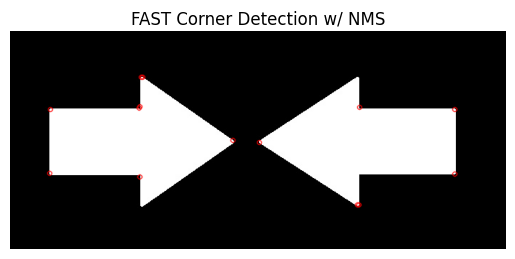

Total Keypoints without NMS: 92


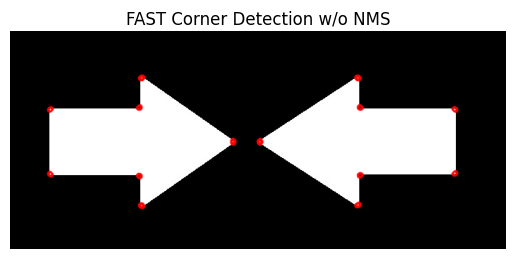

In [7]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(og_img, None)
img3 = cv2.drawKeypoints(og_img, kp, None, color=(255,0,0))

# Print all default params
print("Threshold: {}".format(fast.getThreshold()))
print("NMS:{}".format(fast.getNonmaxSuppression()))
print("Neighborhood: {}".format(fast.getType()))
print("Total Keypoints with NMS: {}".format(len(kp)))

plt.imshow(img3)
plt.title('FAST Corner Detection w/ NMS')
plt.axis('off')
plt.show()

# Disable NMS
fast.setNonmaxSuppression(0)
kp = fast.detect(og_img, None)
print("Total Keypoints without NMS: {}".format(len(kp)))
img4 = cv2.drawKeypoints(og_img, kp, None, color=(255,0,0))

plt.imshow(img4)
plt.title('FAST Corner Detection w/o NMS')
plt.axis('off')
plt.show()